# # Importando Bibliotecas

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Importando o Banco de Dados

In [6]:
df = pd.read_csv('C:/Users/Micro/Desktop/Python Projetos/Treino de Logica/Python/Pandas/data/vendapetroleo.csv', sep=';')

# # Manipulando Dados com Pandas

In [7]:
df.head()

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS
0,1990,JAN,REGIÃO NORDESTE,MARANHÃO,ETANOL HIDRATADO,"7578,939"
1,1990,JUL,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,"24462,251"
2,1990,JUN,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,"25005,954"
3,1990,MAI,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,"18888,239"
4,1990,ABR,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,"27535,918"


# # Filtrando todas as colunas da tabela

In [8]:
df.columns.values

array(['ANO', 'MÊS', 'GRANDE REGIÃO', 'UNIDADE DA FEDERAÇÃO', 'PRODUTO',
       'VENDAS'], dtype=object)

# # Filtrando colunas Especificas

In [9]:
dfColunas = ['ANO', 'MÊS', 'GRANDE REGIÃO', 'UNIDADE DA FEDERAÇÃO', 'PRODUTO', 'VENDAS']

In [10]:
dfFiltrado = df.filter(items=dfColunas)

In [11]:
dfFiltrado


,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS
0,1990,JAN,REGIÃO NORDESTE,MARANHÃO,ETANOL HIDRATADO,"7578,939"
1,1990,JUL,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,"24462,251"
2,1990,JUN,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,"25005,954"
3,1990,MAI,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,"18888,239"
4,1990,ABR,REGIÃO CENTRO-OESTE,GOIÁS,ETANOL HIDRATADO,"27535,918"
...,...,...,...,...,...,...
90499,2024,JUN,REGIÃO NORTE,RONDÔNIA,ÓLEO DIESEL,"83468,857"
90500,2024,MAI,REGIÃO NORTE,RONDÔNIA,ÓLEO DIESEL,"80203,941"
90501,2024,ABR,REGIÃO NORTE,RONDÔNIA,ÓLEO DIESEL,"75102,114"
90502,2024,FEV,REGIÃO NORTE,RONDÔNIA,ÓLEO DIESEL,"70307,273"


In [12]:
dfColunas = df[['PRODUTO', 'VENDAS']]
dfColunas = dfColunas.assign(VENDAS=dfColunas['VENDAS'].str.replace(',','.').astype(float))
dfColunas

soma_vendas = dfColunas['VENDAS'].sum()
print("O Valor total da coluna vendas é:", soma_vendas)
media_vendas = dfColunas['VENDAS'].mean()
print("Esta aqui a média de todas as vendas:", media_vendas)
descricao_vendas = dfColunas['VENDAS'].describe()
print("Aqui esta a descrição detalhada sobre a coluna vendas:", descricao_vendas)


O Valor total da coluna vendas é: 3777295035.271959
Esta aqui a média de todas as vendas: 41736.22199319322
Aqui esta a descrição detalhada sobre a coluna vendas: count    9.050400e+04
mean     4.173622e+04
std      1.033993e+05
min     -3.036000e+00
25%      2.775860e+02
50%      7.165072e+03
75%      3.496644e+04
max      1.312177e+06
Name: VENDAS, dtype: float64


# # Criando Gráfico com a Matplotlib.pyplot


In [13]:
df = pd.read_csv('C:/Users/Micro/Desktop/Python Projetos/Treino de Logica/Python/Pandas/data/vendapetroleo.csv', sep=';')

# # Seleção e conversão de Colunas

In [14]:
dfColunas = df[['PRODUTO', 'VENDAS']]
dfColunas = dfColunas.assign(VENDAS=dfColunas['VENDAS'].str.replace(',', '.').astype(float))

# # Ordenação dos dados

In [15]:
dfOrdenado = dfColunas.sort_values(by='VENDAS', ascending=False)

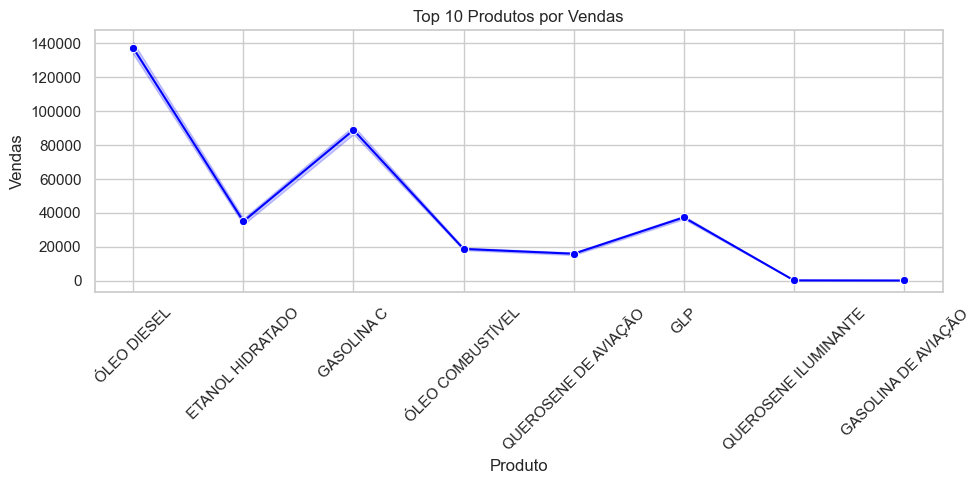

In [16]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,5))
sns.lineplot(x='PRODUTO', y='VENDAS', data=dfOrdenado, marker='o', linestyle='-', color='blue')
#sns.barplot(x=dfOrdenado['PRODUTO'].head(10), y=dfOrdenado['VENDAS'].head(10), hue=dfOrdenado['PRODUTO'].head(10), palette='viridis', dodge=False)
plt.xlabel('Produto')
plt.ylabel('Vendas')
plt.title('Top 10 Produtos por Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ion()
#plt.savefig('Grafico_vendas_Petroleo.png')
plt.show()

# # Filtrar as Cidades que mais teve Vendas

In [17]:
dfColunas = ['ANO', 'ESTADO', 'VENDAS']
df = df.rename(columns={'UNIDADE DA FEDERAÇÃO':'ESTADO'})
dfFiltrado = df.filter(items=dfColunas)
dfFiltrado['VENDAS'] = dfFiltrado['VENDAS'].str.replace(',','.').astype(float)

# # Ordenar os dados por Ano e Vendas

In [29]:
#dfOrdenado = dfFiltrado.sort_values(by=['ANO', 'VENDAS'], ascending=[True, False])
ultimos_3_anos = dfFiltrado['ANO'].unique()[-3:]
dfUltimosAnos = dfFiltrado[dfFiltrado['ANO'].isin(ultimos_3_anos)]

# # Ordenar os dados por ANO e Vendas

In [31]:
dfOrdenado = dfUltimosAnos.sort_values(by=['ANO', 'VENDAS'], ascending=[True, False])

# Selecionar os 5 estados que mais venderam em cada ano

In [36]:
dfTop5 = dfOrdenado.groupby(['ANO', 'ESTADO']).sum().reset_index().sort_values(by=['ANO', 'VENDAS'], ascending=[True, False]).groupby('ANO').head(5)

# # Criar um gráfico para os estados que mais venderam em cada ano

In [19]:
plt.figure(figsize=(15, 8))
sns.set_theme(style='whitegrid')

<Figure size 1500x800 with 0 Axes>

# #Loop para criar um gráfico por ano

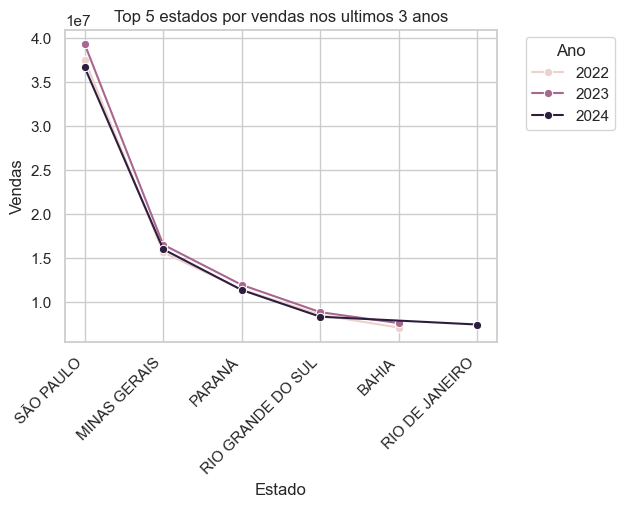

In [37]:
#anos = dfOrdenado['ANO'].unique()
#for ano in anos:
    #dfAno = dfOrdenado[dfOrdenado['ANO'] == ano]
    #sns.lineplot(x='ESTADO', y='VENDAS', data=dfAno, marker='o', linestyle='-', label=f'Ano {ano}')
sns.lineplot(x='ESTADO', y='VENDAS', hue='ANO', data=dfTop5, marker='o', linestyle='-')

plt.xlabel('Estado')
plt.ylabel('Vendas')
plt.title('Top 5 estados por vendas nos ultimos 3 anos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(bottom=0.25, top=0.9, right=0.8)
#plt.tight_layout()
plt.show()